# Logistic Regression:
## For Binary Class Classification (2 Classes)
#### Including Hyper Parameter Tunning and Cross Validation

## What is Logistic Regression?
- Logistic Regression is a **binary classification algorithm** (2 class problem). It can predict if output is True/False or Yes/No or 0/1 or Class1/Class2.
- It finds the **best fit decision boundary** between two classes. (One vs One).
- Instead of a straight-line output like Linear Regression, it **maps predictions to probabilities** using the **sigmoid function**.
- If we want to solve multi class problem i.e. 3 classes, you can do this by creating more than 1 Logistic Model. (One Vs Rest).

## Logistic Regression Formula:
$P(Y=1 | X) = \sigma(z) = \frac{1}{1 + e^{-z}}$

Where:
- $P(Y=1 | X)$ → Probability that the output $Y$ is **1** given input $X$.
- $\sigma(z)$ → Sigmoid function that converts $z$ into a probability.
- $e$ → Euler's number (**≈2.718**), the base of the natural logarithm.
- $z$ → Linear combination of input features:

  $z = w_0 + w_1 x_1 + w_2 x_2 + ... + w_n x_n$

  - $w_0$ → Bias term (intercept).
  - $w_1, w_2, ..., w_n$ → Model weights (learned from data).
  - $x_1, x_2, ..., x_n$ → Input feature values.

## Example:  
  
Predicting whether a Customer will buy a Product based on age and income per year.
  
$z = w_0 + w_1x_1 + w_2x_2$  
  
- $x_1 =$ Customer Age (in years)   
- $x_2 =$ Customer Income (in 1000s per year)  
- $w_0 = -4$ (bias / intercept)  
- $w_1 = 0.05$ (weight / slope for age)  
- $w_2 = 0.01$ (weight / slope for income)​  

Solve for Age $x_1 = 30$  
Salary per year $x_2 = 50,000$ USD  

### Solution:

**Step 1: Compute Z**

$z = w_0 + w_1x_1 + w_2x_2$  

z = (−4) + (0.05×30) + (0.1×50)  
z = −4 + 1.5 + 5  
z = 2.5  

**Step 2: Apply the Sigmoid Function**

$\sigma(z) = \frac{1}{1 + e^{-z}}$  
  
$\sigma(2.5) = \frac{1}{1 + e^{-2.5}}, {where}: e \approx 2.718$  

$\sigma(2.5) = \frac{1}{1 + 0.082}$  

​$\sigma(2.5) \approx 0.923$


**Step 3: Interpret the Probability**

- The model predicts a 92.3% probability that the customer will buy the product.
- Since $\sigma(2.5) = 0.923$ that is > 0.5, we classify the customer as likely to buy.

## Model Performance

### Confusion Matrix:



<img src="./data/ConfusionMatrix.jpg" alt="Confusion Matrix" width="600" height="400">

### Confusion Matrix in Python.

In Python the Confusion matrix is actually a 2D array hence it is shown flipped.

[[TN   FP]  
 [FN   TP]]  

Where:
|   | $0_{Predicated}$ | $1_{Predicated}$ |
|---|---|---|
| $0_{Actual}$ | $TN_{[0, 0]}$ | $FP_{[0, 1]}$ |
| $1_{Actual}$ | $FN_{[1, 0]}$ | $TP_{[1, 1]}$ |

Where:  
- [0, 0] = TN -> $Actual_{False}$, $Predicated_{False}$  
- [0, 1] = FP -> $Actual_{False}$, $Predicated_{True}$  
- [1, 0] = FN -> $Actual_{True}$, $Predicated_{False}$  
- [1, 1] = TP -> $Actual_{True}$, $Predicated_{True}$  

### Other Metrics

- Precision -> $\frac{TP}{(TP + FP)}$  

- Recall -> $\frac{TP}{(TP + FN)}$  

- F1 Score -> $2 \times \frac{(Precision * Recall)}{(Precision + Recall)}$  

- Accuracy -> $\frac{(TP + TN)}{(TP + TN + FP + FN)}$

- Error Rate -> $1 - Accuracy$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score

In [2]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

## Generate simulated data

In [3]:
# Generate simulated dataset (numpy array)
X, y = make_classification(n_samples=10000, n_features=10, n_classes=2, random_state=4)
X = pd.DataFrame(X)

X.head(5), y[:5]

(          0         1         2         3         4         5         6  \
 0 -1.084231  0.238005  0.003455 -3.288356  0.438165  0.017799  0.565892   
 1  1.177068  0.486833  0.030052  0.589913 -1.345572 -0.030373 -0.621186   
 2  0.946569  1.342839  0.636479  0.224458  0.520502 -0.224593 -0.623448   
 3 -1.899321  1.252384 -0.860059 -2.147932 -1.086723  0.314315  1.166574   
 4 -1.521279 -0.201535  0.043301 -1.274039  0.148620  0.012403  0.786218   
 
           7         8         9  
 0 -0.204347 -0.780478 -0.065163  
 1 -1.299591  0.695640  0.969646  
 2  0.927812 -0.463195  0.322156  
 3 -0.141434 -0.083974  0.466047  
 4  0.367590 -0.644914  0.668769  ,
 array([1, 1, 0, 1, 1]))

In [4]:
# Check the unique values in their count in array y
np.unique(y, return_counts=True)

(array([0, 1]), array([4996, 5004]))

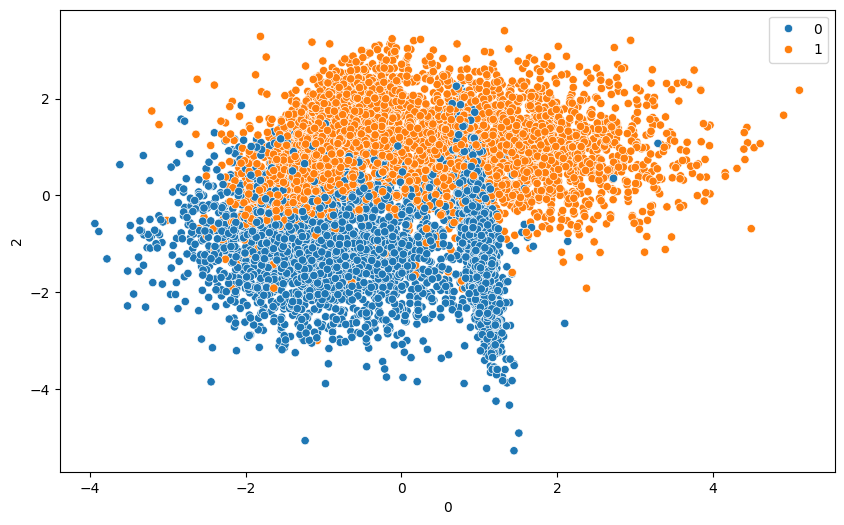

In [5]:
# set figure size
plt.figure(figsize=(10,6))

sns.scatterplot(data=X, x=X[0], y=X[2], hue=y)
# set legend location
plt.legend(loc='upper right')
plt.show()

## Train the Model on Training Data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7000, 10), (7000,), (3000, 10), (3000,))

In [7]:
logistic_m1 = LogisticRegression(multi_class='ovr')

In [8]:
# Fit the model using training data
logistic_m1 = logistic_m1.fit(X_train, y_train)

C:\Users\msyed\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


## Make Prediction on Test Data

In [9]:
# Predict on Test Data
y_pred_m1 = logistic_m1.predict(X_test)
y_pred_m1

array([0, 1, 0, ..., 0, 1, 0])

In [10]:
# Get predicted probabilities
pred_prob_m1 = logistic_m1.predict_proba(X_test)

pred_prob_m1[:5]

array([[0.98584094, 0.01415906],
       [0.10347151, 0.89652849],
       [0.93832365, 0.06167635],
       [0.02982654, 0.97017346],
       [0.96175844, 0.03824156]])

In [11]:
# From predicted probabilities convert to Class1 and 1 Class2
y_pred_m1_class = pd.DataFrame(np.where(y_pred_m1 > 0.5, 'Class 1', 'Class 2'))

y_pred_m1_class.head()

,0
0,Class 2
1,Class 1
2,Class 2
3,Class 1
4,Class 2


## Evaluate Performance Metrics

In [12]:
# Helping Method to Display Report
def evaluate_display_model(y_true, y_pred, desc, multi_class=False, class_rpt = True):
    """
    Computes and displays classification metrics including:
    - Confusion Matrix
    - Precision
    - Recall
    - F1 Score
    - Accuracy
    - Error Rate
    - Classification Report (Conditional)
    
    Args:
    y_true (array-like): Actual class labels
    y_pred (array-like): Predicted class labels
    desc: Description to be printed as Model Stats heading
    class_rpt (bool, optional): If True (Default), displays a classification report.
    
    Returns:
    dict: A dictionary containing all computed metrics.
    """
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Extract True Positives (TP), False Positives (FP), False Negatives (FN), True Negatives (TN)
    if not multi_class:
        TN, FP, FN, TP = conf_matrix.ravel()        

    # Compute metrics
    precision = recall = f1score = 0
    if not multi_class:
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1score = f1_score(y_true, y_pred)
    
    accuracy = accuracy_score(y_true, y_pred)
    error_rate = 1 - accuracy
    class_report = ""
    if class_rpt:
        class_report = classification_report(y_true, y_pred, zero_division=1)

    # Print Confusion Matrix
    print(f"\n{desc} Performance:")
    print("\nConfusion Matrix:")
    print(conf_matrix)
    if not multi_class:
        print(f"\nWhere:")
        print(f"TP (Actual +ve, Predicted +ve) = {TP}")
        print(f"FP (Actual -ve, Predicted +ve) = {FP}")
        print(f"FN (Actual +ve, Predicted -ve) = {FN}")
        print(f"TN (Actual -ve, Predicted -ve) = {TN}")

    # Print Other Metrics
    print(f"\nOther Metrics:")
    if not multi_class:
        print(f"Precision (TP / (TP + FP)): {precision:.4f}")
        print(f"Recall (TP / (TP + FN)): {recall:.4f}")
        print(f"F1 Score (2 * (Precision * Recall) / (Precision + Recall)): {f1score:.4f}")
    print(f"Accuracy ((TP + TN) / (TP + TN + FP + FN)): {accuracy:.4f}")
    print(f"Error Rate (1 - Accuracy): {error_rate:.4f}")
    if class_rpt:
        print(f"\nClassification Report:\n{class_report}")

    # Return all metrics in a dictionary (useful for further analysis)
    return {
        "Confusion Matrix": conf_matrix,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1score,
        "Accuracy": accuracy,
        "Error Rate": error_rate,
        "Classification Report": class_report
    }

In [13]:
# Performance Metrics
evaluate_display_model(y_test, y_pred_m1, "Model 1 (Before Tuning)")


Model 1 (Before Tuning) Performance:

Confusion Matrix:
[[1274  203]
 [ 211 1312]]

Where:
TP (Actual +ve, Predicted +ve) = 1312
FP (Actual -ve, Predicted +ve) = 203
FN (Actual +ve, Predicted -ve) = 211
TN (Actual -ve, Predicted -ve) = 1274

Other Metrics:
Precision (TP / (TP + FP)): 0.8660
Recall (TP / (TP + FN)): 0.8615
F1 Score (2 * (Precision * Recall) / (Precision + Recall)): 0.8637
Accuracy ((TP + TN) / (TP + TN + FP + FN)): 0.8620
Error Rate (1 - Accuracy): 0.1380

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1477
           1       0.87      0.86      0.86      1523

    accuracy                           0.86      3000
   macro avg       0.86      0.86      0.86      3000
weighted avg       0.86      0.86      0.86      3000



{'Confusion Matrix': array([[1274,  203],
        [ 211, 1312]]),
 'Precision': np.float64(0.866006600660066),
 'Recall': np.float64(0.8614576493762311),
 'F1 Score': np.float64(0.8637261356155366),
 'Accuracy': 0.862,
 'Error Rate': 0.138,
 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.86      0.86      0.86      1477\n           1       0.87      0.86      0.86      1523\n\n    accuracy                           0.86      3000\n   macro avg       0.86      0.86      0.86      3000\nweighted avg       0.86      0.86      0.86      3000\n'}

## Interpret the Performance Metrics

- High Precission (84%)  
- High Recall (85%)
- High F1 Score (84.5%)
- High Accuracy (85%)
- Low False Positive Rate (15%)
- Low False Negative Rate (15%)

**Conclusion:** This is a good model and generalizes well on unseen data.

## HyperParameter Tuning And Cross Validation (CV)

### **HyperParameter Tuning**

**Hyperparameter tuning** is the process of selecting the best combination of **hyperparameters** to optimize a machine learning model’s performance.

- **Grid Search CV**
  - **Grid Search CV** is an exhaustive search technique that evaluates all possible **combinations** of hyperparameters.
  - It performs a **brute-force search** over a predefined **grid of values**.
  - **Best for small datasets** where computational cost is manageable.
  - **Disadvantage:** Can be **computationally expensive** for large datasets.
   
- **Random Search CV**
  - **Random Search CV** is a hyperparameter tuning technique that, instead of searching every possible combination like Grid Search, **randomly selects values** for hyperparameters.
  - It is **faster than Grid Search CV** and can be **more effective in high-dimensional spaces**.
  - **Best for large hyperparameter spaces** where exhaustive search is impractical.
  - **Disadvantage:** It might **miss the best combination** since it does not check all possibilities.


### **Cross Validation**

**Cross-validation** is a technique used to evaluate the performance of a model on unseen data. It involves splitting the training data into K samples.

- **Leave One Out Cross Validation (LOOCV):** 
  
  - Model is validated on **each individual data point** in the training set.
  - Requires **N iterations** (where N = number of samples).
  - **Example**: If the dataset has 100 samples, **100 models are trained**.
  - **Advantage:** Utilizes **maximum data** for training.
  - **Disadvantage:** Computationally expensive for large datasets.
  
- **Leave P Out Cross Validation (LPOCV):**
  - Similar to LOOCV, but instead of taking one data point out at a time, P data points.
  - Take N-P Iterations.
  - **Example**: If dataset has 100 samples and P=5, then **95 samples are used for training, and 5 for validation** in each iteration.
  
- **K-Fold Cross Validation:** 
  - Splits the dataset into **K equal parts** (or "folds").
  - The model is trained on **K-1 folds** and validated on the **remaining fold**.
  - This process repeats **K times**, each time using a different fold for validation.
  - **Total Iterations:** $N/K$
  - **Example**:
    - If dataset size = **500** and **K = 10**, then:
      - **Iterations** = $500/10 = 50$
    - The **average accuracy across K iterations** is used as the performance metric.
  - **Advantage:** More efficient than LOOCV.
  - **Disadvantage:** May not perform well on small datasets.- Takes K Number of samples to train the model.

- **Stratified K-Fold Cross Validation:**
  - Works like **K-Fold CV** but **preserves the class distribution** in each fold.
  - Useful for **imbalanced datasets** where some classes appear much less frequently.
  - Ensures that **each fold has the same proportion of classes** as the original dataset.
  - **Example**:
    - If dataset has **70% class A and 30% class B**, each fold maintains the **same ratio**.
  - **Advantage:** Prevents bias due to imbalanced data.
  - **Disadvantage:** Slightly more complex than standard K-Fold CV. 

- **Time Series Cross Validation:**
  - Used for **time-dependent data** (e.g., stock prices, weather forecasting).
  - Unlike random splits, **future data cannot be used to train past data**.
  - Splitting is done **sequentially**, preserving the time order.
  - **Example**:
    - Train on **January to June**, test on **July**.
    - Train on **January to July**, test on **August**.
    - And so on...
  - **Advantage:** Maintains temporal dependencies.
  - **Disadvantage:** Not all data is used in early iterations.

| Cross-Validation Method | Best Used For | Iterations | Key Feature |
|-------------------------|--------------|------------|-------------|
| **LOOCV** | Small datasets | N | Uses 1 sample for validation per iteration |
| **LPOCV** | Small datasets | N-P | Uses P samples for validation per iteration |
| **K-Fold CV** | General-purpose | N/K | Splits into K folds and rotates validation set |
| **Stratified K-Fold** | Imbalanced datasets | N/K | Preserves class proportions in folds |
| **Time Series CV** | Time-dependent data | Variable | Preserves chronological order |

## Grid Search Cross Validadtion:

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


### Defining Hyperparameters

In [15]:
# Define hyper parameters
#penalty = ['l1', 'l2', 'elasticnet'] #L1 = Lasso, L2 = Ridge, ElasticNet = Combination of Both
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01] # Inverse of regularization strength
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] # Algorithm to be used. Only solvers that support 'l1' and 'elasticnet'
#solver = ['liblinear', 'saga'] # Saga supports all the penalty terms l1, l2, and elasticnet hence passing saga
l1_ratio = [0.1, 0.5, 0.9]  # Required for ElasticNet

In [16]:
# Create a dictionary for hyperparameters to pass to GridSeach
params = dict( 
    penalty = penalty,
    C = c_values,
    solver = solver,
    #l1_ratio = l1_ratio # Only needed for ElasticNet penalty 
)

In [17]:
# Startified K-Fold Cross Validation
# We want to do Cross Validation 5 times
startify_kfold_cv = StratifiedKFold(n_splits=5, shuffle=False)

In [18]:
# Create Logistic Model
logistic_m2 = LogisticRegression()

In [19]:
# Define Grid Search Cross Validator to tune the Hyperparmeters
grid_search = GridSearchCV(
    estimator = logistic_m2,
    param_grid = params,
    scoring = 'accuracy', # I am looking for increased accuracy
    cv = startify_kfold_cv, # How many times I need to do K-Fold cross validation
    n_jobs = -1, # Use all available cores of our CPU
)

### Training the Model with Grid Search Cross CV

In [20]:
grid_search = grid_search.fit(X_train, y_train)

grid_search

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [21]:
grid_search.best_params_, grid_search.best_score_

({'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'},
 np.float64(0.8657142857142859))

### Testing the Tuned Model

In [22]:
y_pred_m2 = grid_search.predict(X_test)

### Comparing Models Performance

#### We can observe slight improvement in Accuracy (Our Selected Metric in Hyper Parameter) for the tuned model.

In [23]:
# Performance Metrics
evaluate_display_model(y_test, y_pred_m1, "Model 1 (Before Tuning)")
pass


Model 1 (Before Tuning) Performance:

Confusion Matrix:
[[1274  203]
 [ 211 1312]]

Where:
TP (Actual +ve, Predicted +ve) = 1312
FP (Actual -ve, Predicted +ve) = 203
FN (Actual +ve, Predicted -ve) = 211
TN (Actual -ve, Predicted -ve) = 1274

Other Metrics:
Precision (TP / (TP + FP)): 0.8660
Recall (TP / (TP + FN)): 0.8615
F1 Score (2 * (Precision * Recall) / (Precision + Recall)): 0.8637
Accuracy ((TP + TN) / (TP + TN + FP + FN)): 0.8620
Error Rate (1 - Accuracy): 0.1380

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1477
           1       0.87      0.86      0.86      1523

    accuracy                           0.86      3000
   macro avg       0.86      0.86      0.86      3000
weighted avg       0.86      0.86      0.86      3000



In [24]:
evaluate_display_model(y_test, y_pred_m2, "Model 2 (After GridSearchCV)")
pass


Model 2 (After GridSearchCV) Performance:

Confusion Matrix:
[[1273  204]
 [ 207 1316]]

Where:
TP (Actual +ve, Predicted +ve) = 1316
FP (Actual -ve, Predicted +ve) = 204
FN (Actual +ve, Predicted -ve) = 207
TN (Actual -ve, Predicted -ve) = 1273

Other Metrics:
Precision (TP / (TP + FP)): 0.8658
Recall (TP / (TP + FN)): 0.8641
F1 Score (2 * (Precision * Recall) / (Precision + Recall)): 0.8649
Accuracy ((TP + TN) / (TP + TN + FP + FN)): 0.8630
Error Rate (1 - Accuracy): 0.1370

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1477
           1       0.87      0.86      0.86      1523

    accuracy                           0.86      3000
   macro avg       0.86      0.86      0.86      3000
weighted avg       0.86      0.86      0.86      3000



## Randomized Search Cross Validation

In [25]:
from sklearn.model_selection import RandomizedSearchCV

In [26]:
logistic_m3 = LogisticRegression()

In [27]:
random_search = RandomizedSearchCV(
    estimator=logistic_m3, 
    param_distributions=params,
    cv = 5,
    scoring='accuracy'
)

In [28]:
random_search = random_search.fit(X_train, y_train)

In [29]:
random_search.best_params_, random_search.best_score_

({'solver': 'liblinear', 'penalty': 'l2', 'C': 0.01},
 np.float64(0.8657142857142859))

In [30]:
y_pred_m3 = random_search.predict(X_test)

In [31]:
evaluate_display_model(y_test, y_pred_m3, "Model 3 (After RandomSearchCV)")
pass


Model 3 (After RandomSearchCV) Performance:

Confusion Matrix:
[[1273  204]
 [ 207 1316]]

Where:
TP (Actual +ve, Predicted +ve) = 1316
FP (Actual -ve, Predicted +ve) = 204
FN (Actual +ve, Predicted -ve) = 207
TN (Actual -ve, Predicted -ve) = 1273

Other Metrics:
Precision (TP / (TP + FP)): 0.8658
Recall (TP / (TP + FN)): 0.8641
F1 Score (2 * (Precision * Recall) / (Precision + Recall)): 0.8649
Accuracy ((TP + TN) / (TP + TN + FP + FN)): 0.8630
Error Rate (1 - Accuracy): 0.1370

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1477
           1       0.87      0.86      0.86      1523

    accuracy                           0.86      3000
   macro avg       0.86      0.86      0.86      3000
weighted avg       0.86      0.86      0.86      3000



# Logistic Regression

## For Multi Class Classification Problem

In [32]:
# Import OneVsRestClassifier
from sklearn.multiclass import OneVsRestClassifier

In [33]:
# Generate simulated dataset (numpy array)
X, y = make_classification(n_samples=10000, n_features=10, n_informative=3, n_classes=3, random_state=42)
X = pd.DataFrame(X)

X.head(5), y[:5]

(          0         1         2         3         4         5         6  \
 0  0.210056 -1.910052 -1.289798  1.440216  0.191247  0.727945 -0.231102   
 1 -0.211285 -0.324519 -1.050498  2.014252  1.590855 -1.191408 -0.754343   
 2 -1.486492  0.653536  0.188264 -0.324406 -2.565891  0.237103 -0.986380   
 3 -1.229880 -0.360071  0.122048  0.523228 -0.307641 -0.562482 -0.585375   
 4  0.205817 -0.759668  0.816182 -0.434530  1.555692  1.719614  0.798338   
 
           7         8         9  
 0  0.545916 -0.025466 -0.837901  
 1 -1.041703 -0.601982  1.883517  
 2 -0.043608  1.042549 -0.578253  
 3  0.954726  0.126262  1.412016  
 4 -1.105199 -0.667004  0.537719  ,
 array([0, 1, 2, 1, 2]))

In [34]:
# Check the unique values in their count in array y.
# We have 3 classes now [0, 1, 2]
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([3329, 3335, 3336]))

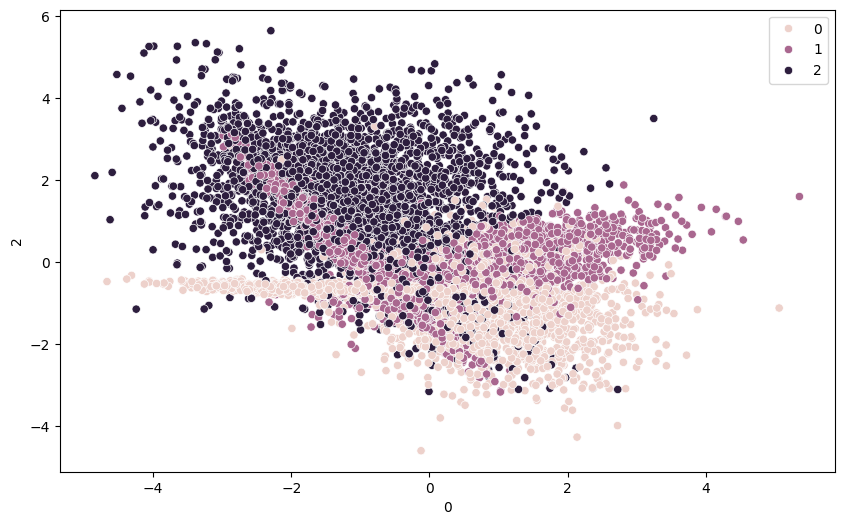

In [35]:
# set figure size
plt.figure(figsize=(10,6))

sns.scatterplot(data=X, x=X[0], y=X[2], hue=y)
# set legend location
plt.legend(loc='upper right')
plt.show()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7000, 10), (7000,), (3000, 10), (3000,))

In [37]:
# When multi_class='ovr' is passed. It'll create the N numbers of models.
# Where N is the Number of classes.
logistic_multi = OneVsRestClassifier(LogisticRegression()) 

In [38]:
logistic_multi = logistic_multi.fit(X_train, y_train)

In [39]:
y_pred_multi = logistic_multi.predict(X_test)

In [40]:
evaluate_display_model(y_test, y_pred_multi, "MultiClass LogisticRegression", multi_class=True)
pass


MultiClass LogisticRegression Performance:

Confusion Matrix:
[[904  73  11]
 [368 475 155]
 [122  79 813]]

Other Metrics:
Accuracy ((TP + TN) / (TP + TN + FP + FN)): 0.7307
Error Rate (1 - Accuracy): 0.2693

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.91      0.76       988
           1       0.76      0.48      0.58       998
           2       0.83      0.80      0.82      1014

    accuracy                           0.73      3000
   macro avg       0.75      0.73      0.72      3000
weighted avg       0.75      0.73      0.72      3000



## Logistic Regression for Imbalanced Dataset:

In [41]:
# Generate simulated unbalanced dataset (numpy array).
X, y = make_classification(n_samples=10000, n_features=10, n_classes=2, n_clusters_per_class=1, weights=[0.99], random_state=4)
X = pd.DataFrame(X)

X.head(5), y[:5]

(          0         1         2         3         4         5         6  \
 0 -1.174424  1.157228 -0.376209 -0.810327  0.750397 -1.257487  0.915765   
 1 -0.218935 -1.175252 -0.156981 -0.504622 -1.637774 -1.072133 -1.373948   
 2  1.002442 -1.164779  0.035646 -0.151144  0.125618 -0.630239  0.033787   
 3  0.191961  0.588660 -0.466643 -0.910922  2.774932 -1.250066  1.616288   
 4 -0.913234  0.511468 -0.840513 -1.351672 -1.699879 -1.301161 -0.216388   
 
           7         8         9  
 0 -1.988274  0.294094 -1.256793  
 1  0.507790  1.638939 -1.190246  
 2  0.990221 -1.040946 -0.792389  
 3 -1.149732 -1.046155 -1.182221  
 4  2.004906  0.188156 -0.973387  ,
 array([0, 0, 0, 0, 0]))

In [42]:
# Now our dataset is not balanced. It is biased toward class 0. 
np.unique(y, return_counts=True)

(array([0, 1]), array([9849,  151]))

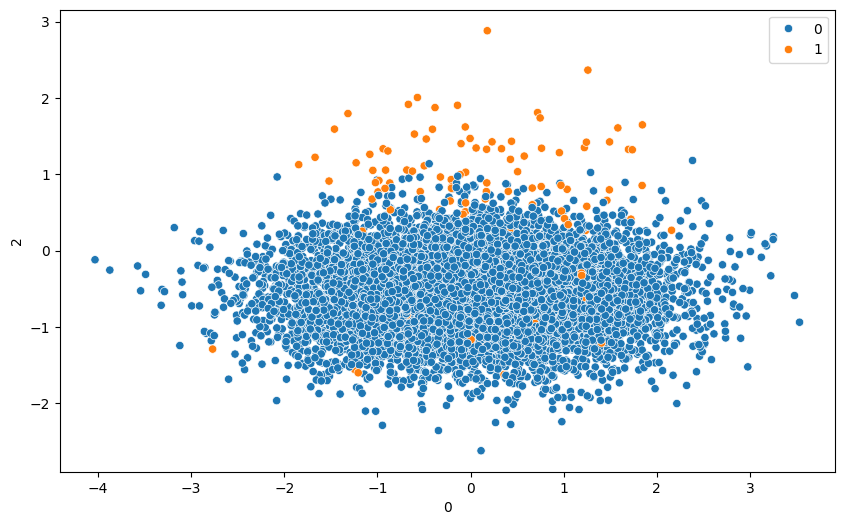

In [43]:
# set figure size
plt.figure(figsize=(10,6))

sns.scatterplot(data=X, x=X[0], y=X[2], hue=y)
# set legend location
plt.legend(loc='upper right')
plt.show()

In [44]:
class_weights = [{0:w, 1:y} for w in [1, 10, 50, 100] for y in [1, 10, 50, 100]] 
class_weights

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [45]:
logistic_imbalance = LogisticRegression()

In [46]:
# Define the Hyper Param again and set weights as well as param
params = dict(
    penalty=penalty,
    C=c_values,
    solver=solver,
    class_weight=class_weights
)

In [47]:
random_search = RandomizedSearchCV(
    estimator=logistic_imbalance, 
    param_distributions=params,
    cv = startify_kfold_cv,
    scoring='accuracy'
)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7000, 10), (7000,), (3000, 10), (3000,))

In [49]:
random_search = random_search.fit(X_train, y_train)

In [50]:
# Class 0 was given 10 weightage
# Class 1 was given 100 weightage to counter imbalance data

random_search.best_params_, random_search.best_score_

({'solver': 'lbfgs', 'penalty': 'l2', 'class_weight': {0: 1, 1: 10}, 'C': 0.1},
 np.float64(0.9897142857142857))

In [51]:
y_pred_imbalance = random_search.predict(X_test)

In [52]:
evaluate_display_model(y_test, y_pred_imbalance, "Imbalanced Class LogisticRegression")
pass


Imbalanced Class LogisticRegression Performance:

Confusion Matrix:
[[2954    4]
 [  27   15]]

Where:
TP (Actual +ve, Predicted +ve) = 15
FP (Actual -ve, Predicted +ve) = 4
FN (Actual +ve, Predicted -ve) = 27
TN (Actual -ve, Predicted -ve) = 2954

Other Metrics:
Precision (TP / (TP + FP)): 0.7895
Recall (TP / (TP + FN)): 0.3571
F1 Score (2 * (Precision * Recall) / (Precision + Recall)): 0.4918
Accuracy ((TP + TN) / (TP + TN + FP + FN)): 0.9897
Error Rate (1 - Accuracy): 0.0103

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2958
           1       0.79      0.36      0.49        42

    accuracy                           0.99      3000
   macro avg       0.89      0.68      0.74      3000
weighted avg       0.99      0.99      0.99      3000



# ROC Curve And ROC AUC Curve

In [53]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [54]:
# Generate simulated unbalanced dataset (numpy array).
X, y = make_classification(n_samples=10000, n_features=10, n_classes=2, n_clusters_per_class=1, random_state=10)
X = pd.DataFrame(X)

X.head(5), y[:5]

(          0         1         2         3         4         5         6  \
 0 -1.266677  1.145857 -1.110291  1.505612 -1.871110  2.321016 -0.563773   
 1  0.845207  1.589812 -1.037353  0.137540  1.180734  1.995488  0.408736   
 2 -1.494454  1.112637 -1.129233  0.470653  1.524422 -0.263459  1.051071   
 3 -2.556666  2.402436 -2.308714  1.114487  0.573397 -0.540146 -0.198464   
 4  1.057075  0.546803 -0.208643  0.379890  0.097208 -0.153412 -1.113582   
 
           7         8         9  
 0  0.442747 -1.033146  0.241501  
 1  0.433145 -2.655427 -0.593874  
 2 -0.355374 -0.879007 -1.594941  
 3 -2.031418 -2.212647 -1.565811  
 4  0.674774 -1.273139  0.520299  ,
 array([1, 0, 1, 1, 0]))

In [55]:
np.unique(y, return_counts=True)

(array([0, 1]), array([5010, 4990]))

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7500, 10), (7500,), (2500, 10), (2500,))

In [57]:
# Create a dummy model with default output as 0

dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob[:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [58]:
logistic_roc = LogisticRegression()
logistic_roc = logistic_roc.fit(X_train, y_train)

In [59]:
y_pred_prob_roc = logistic_roc.predict_proba(X_test)
y_pred_prob_roc

array([[0.01267415, 0.98732585],
       [0.99723706, 0.00276294],
       [0.98016693, 0.01983307],
       ...,
       [0.99737298, 0.00262702],
       [0.00716419, 0.99283581],
       [0.78897929, 0.21102071]])

In [60]:
# np.where() doc
# https://numpy.org/doc/stable/reference/generated/numpy.where.html
np.where(y_pred_prob_roc >= 0.5, True, False)

array([[False,  True],
       [ True, False],
       [ True, False],
       ...,
       [ True, False],
       [False,  True],
       [ True, False]])

In [61]:
dummy_model_auc = roc_auc_score(y_test, dummy_model_prob)
model_auc = roc_auc_score(y_test, y_pred_prob_roc[:, 1])

dummy_model_auc, model_auc

(np.float64(0.5), np.float64(0.9620734385058899))

In [ ]:
# Get the FPR rate for the 2 models. 
# FPR = False Positive Rate
# TPR = True Positive Rate
# Calculate ROC Curve

dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(y_test, y_pred_prob_roc[:, 1])

model_fpr[:10], model_tpr[:10], thresholds[:10]

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.45308538e-04,
        8.45308538e-04, 1.69061708e-03, 1.69061708e-03, 2.53592561e-03,
        2.53592561e-03, 3.38123415e-03, 3.38123415e-03, 4.22654269e-03,
        4.22654269e-03, 5.07185123e-03, 5.07185123e-03, 5.91715976e-03,
        5.91715976e-03, 6.76246830e-03, 6.76246830e-03, 7.60777684e-03,
        7.60777684e-03, 8.45308538e-03, 8.45308538e-03, 9.29839391e-03,
        9.29839391e-03, 1.01437025e-02, 1.01437025e-02, 1.09890110e-02,
        1.09890110e-02, 1.18343195e-02, 1.18343195e-02, 1.26796281e-02,
        1.26796281e-02, 1.35249366e-02, 1.35249366e-02, 1.52155537e-02,
        1.52155537e-02, 1.60608622e-02, 1.60608622e-02, 1.69061708e-02,
        1.69061708e-02, 1.77514793e-02, 1.77514793e-02, 1.85967878e-02,
        1.85967878e-02, 2.02874049e-02, 2.02874049e-02, 2.11327134e-02,
        2.11327134e-02, 2.19780220e-02, 2.19780220e-02, 2.28233305e-02,
        2.28233305e-02, 2.45139476e-02, 2.45139476e-02, 2.535925

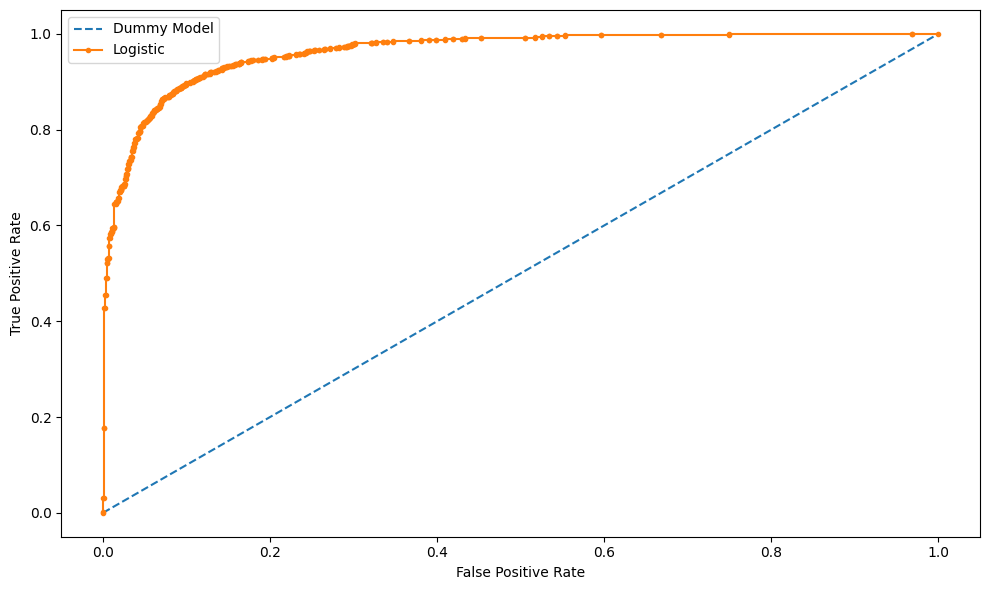

In [63]:
fig = plt.figure(figsize=(10, 6))
plt.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.tight_layout()
plt.show()

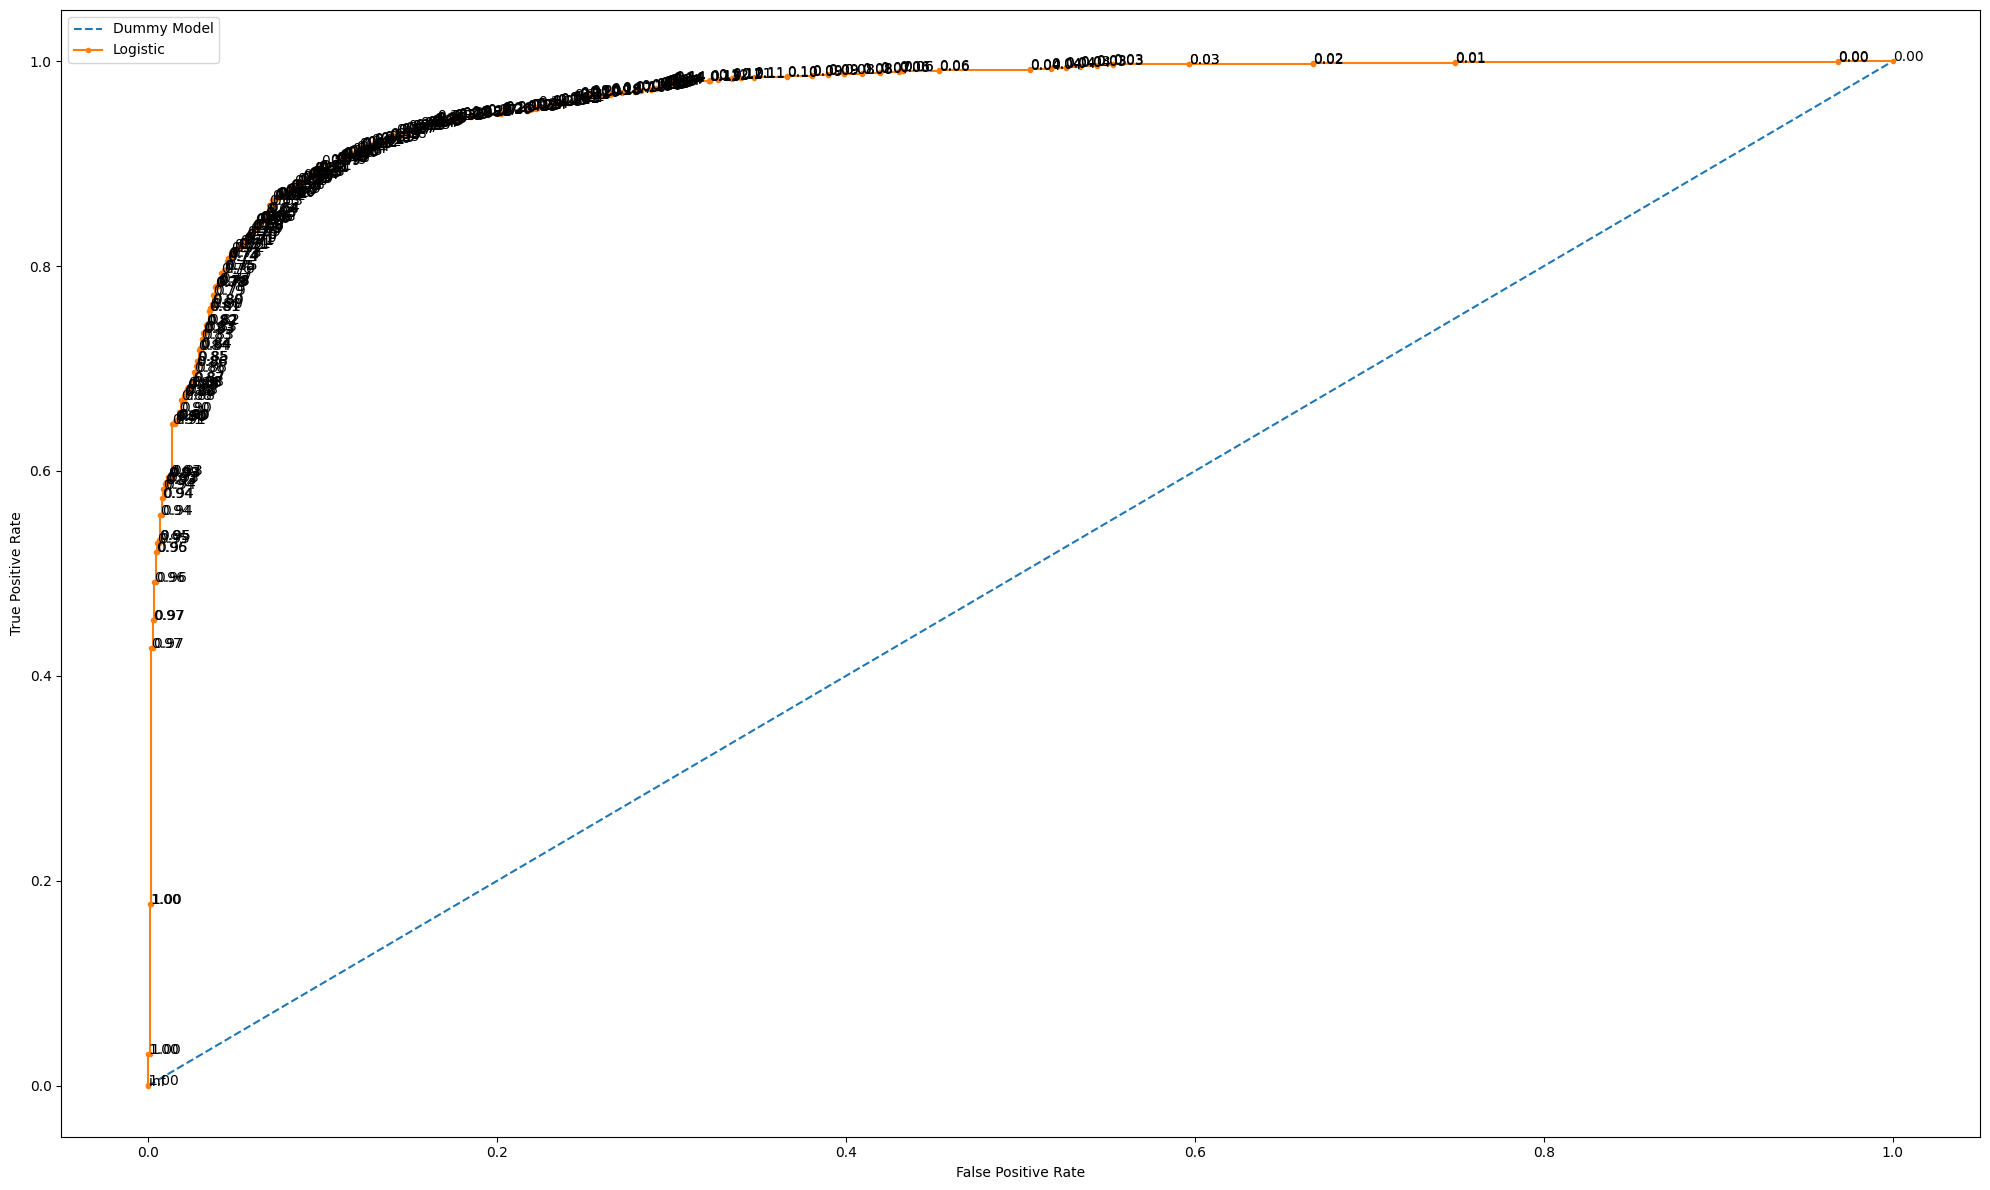

In [64]:
# Initialize figure and axis correctly
fig, ax = plt.subplots(figsize=(20, 12))

plt.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic')

# Annotate thresholds at corresponding FPR & TPR points
for fpr, tpr, th in zip(model_fpr, model_tpr, thresholds):
    ax.annotate(f"{th:.2f}", xy=(fpr, tpr), fontsize=10, color='black')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.tight_layout()
plt.show()